## Sibi's Learning CNN

In [11]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential, Model

In [3]:
#load mnist dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [4]:
#normalize pixel values to be between 0 and 1
train_images, test_images = train_images /255.0, test_images / 255.0

In [5]:
model_cnn = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [6]:
model_cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model_cnn.fit(train_images, train_labels, epochs=10)

Epoch 1/10


2023-12-11 13:19:08.024953: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1875/1875 [==============================] - 15s 8ms/step - loss: 0.1433 - accuracy: 0.9561
Epoch 2/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0457 - accuracy: 0.9859
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0344 - accuracy: 0.9895
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0257 - accuracy: 0.9919
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0208 - accuracy: 0.9932
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0156 - accuracy: 0.9949
Epoch 7/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0146 - accuracy: 0.9953
Epoch 8/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0118 - accuracy: 0.9963
Epoch 9/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0100 - accuracy: 0.9967
Epoch 10/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0092

In [8]:
test_loss, test_acc = model_cnn.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0350 - accuracy: 0.9912 - 1s/epoch - 4ms/step

Test accuracy: 0.9911999702453613


#### Lets Fine tune this model

In [9]:
# freeze the model
for layer in model_cnn.layers:
    layer.trainable = False

In [13]:
# adding new layers
x = model_cnn.layers[-2].output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

In [15]:
model = Model(inputs=model_cnn.input, outputs=predictions)

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0133 - accuracy: 0.9961
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0067 - accuracy: 0.9982
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0051 - accuracy: 0.9984
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0042 - accuracy: 0.9986
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0045 - accuracy: 0.9989
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0034 - accuracy: 0.9990
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0035 - accuracy: 0.9990
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0032 - accuracy: 0.9992
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0022 - accuracy: 0.9994
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.002

In [18]:
test_loss, test_acc = model_cnn.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0350 - accuracy: 0.9912 - 970ms/epoch - 3ms/step

Test accuracy: 0.9911999702453613


### lets try with Apple watch time series data

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#importing datasets
apl = pd.read_csv('/Users/sibivishtan/Downloads/learning_DL/data/aw_fb_data.csv').drop(columns=['Unnamed: 0', 'X1'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6264 entries, 0 to 6263
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   age                   6264 non-null   int64  
 1   gender                6264 non-null   int64  
 2   height                6264 non-null   float64
 3   weight                6264 non-null   float64
 4   steps                 6264 non-null   float64
 5   hear_rate             6264 non-null   float64
 6   calories              6264 non-null   float64
 7   distance              6264 non-null   float64
 8   entropy_heart         6264 non-null   float64
 9   entropy_setps         6264 non-null   float64
 10  resting_heart         6264 non-null   float64
 11  corr_heart_steps      6264 non-null   float64
 12  norm_heart            6264 non-null   float64
 13  intensity_karvonen    6264 non-null   float64
 14  sd_norm_heart         6264 non-null   float64
 15  steps_times_distance 

None

,age,gender,height,weight,steps,hear_rate,calories,distance,entropy_heart,entropy_setps,resting_heart,corr_heart_steps,norm_heart,intensity_karvonen,sd_norm_heart,steps_times_distance,device,activity
0,20,1,168.0,65.4,10.771429,78.531302,0.344533,0.008327,6.221612,6.116349,59.0,1.000000,19.531302,0.138520,1.000000,0.089692,apple watch,Lying
1,20,1,168.0,65.4,11.475325,78.453390,3.287625,0.008896,6.221612,6.116349,59.0,1.000000,19.453390,0.137967,1.000000,0.102088,apple watch,Lying
2,20,1,168.0,65.4,12.179221,78.540825,9.484000,0.009466,6.221612,6.116349,59.0,1.000000,19.540825,0.138587,1.000000,0.115287,apple watch,Lying
3,20,1,168.0,65.4,12.883117,78.628260,10.154556,0.010035,6.221612,6.116349,59.0,1.000000,19.628260,0.139208,1.000000,0.129286,apple watch,Lying
4,20,1,168.0,65.4,13.587013,78.715695,10.825111,0.010605,6.221612,6.116349,59.0,0.982816,19.715695,0.139828,0.241567,0.144088,apple watch,Lying
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6259,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,0.000000,1.000000,fitbit,Running 7 METs
6260,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs
6261,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs
6262,46,0,157.5,71.4,1.000000,35.000000,20.500000,1.000000,0.000000,0.000000,35.0,1.000000,0.000000,0.000000,1.000000,1.000000,fitbit,Running 7 METs


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'gender'}>,
        <Axes: title={'center': 'height'}>,
        <Axes: title={'center': 'weight'}>],
       [<Axes: title={'center': 'steps'}>,
        <Axes: title={'center': 'hear_rate'}>,
        <Axes: title={'center': 'calories'}>,
        <Axes: title={'center': 'distance'}>],
       [<Axes: title={'center': 'entropy_heart'}>,
        <Axes: title={'center': 'entropy_setps'}>,
        <Axes: title={'center': 'resting_heart'}>,
        <Axes: title={'center': 'corr_heart_steps'}>],
       [<Axes: title={'center': 'norm_heart'}>,
        <Axes: title={'center': 'intensity_karvonen'}>,
        <Axes: title={'center': 'sd_norm_heart'}>,
        <Axes: title={'center': 'steps_times_distance'}>]], dtype=object)

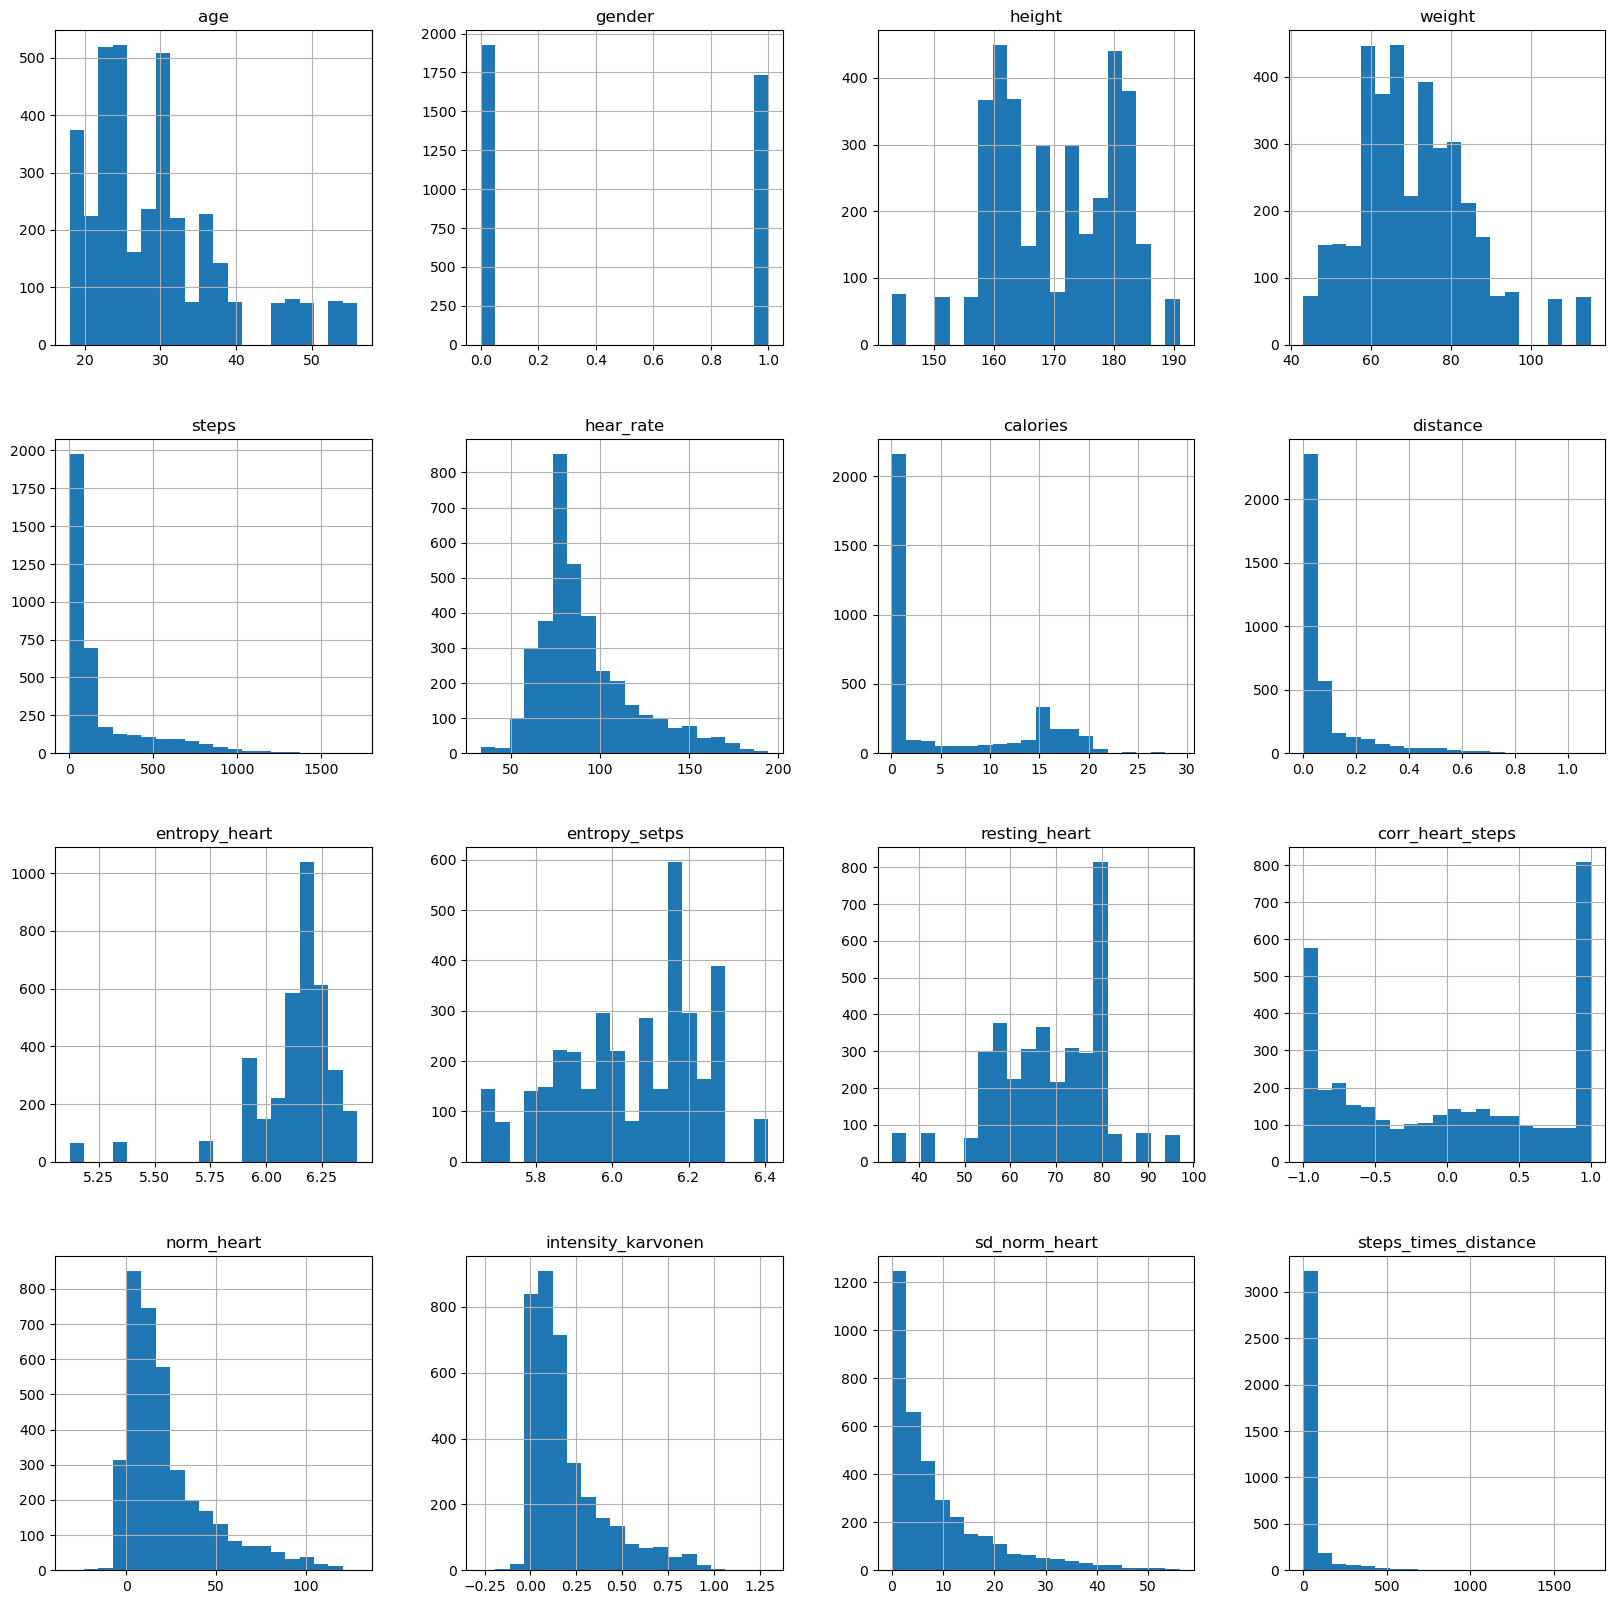

<Axes: >

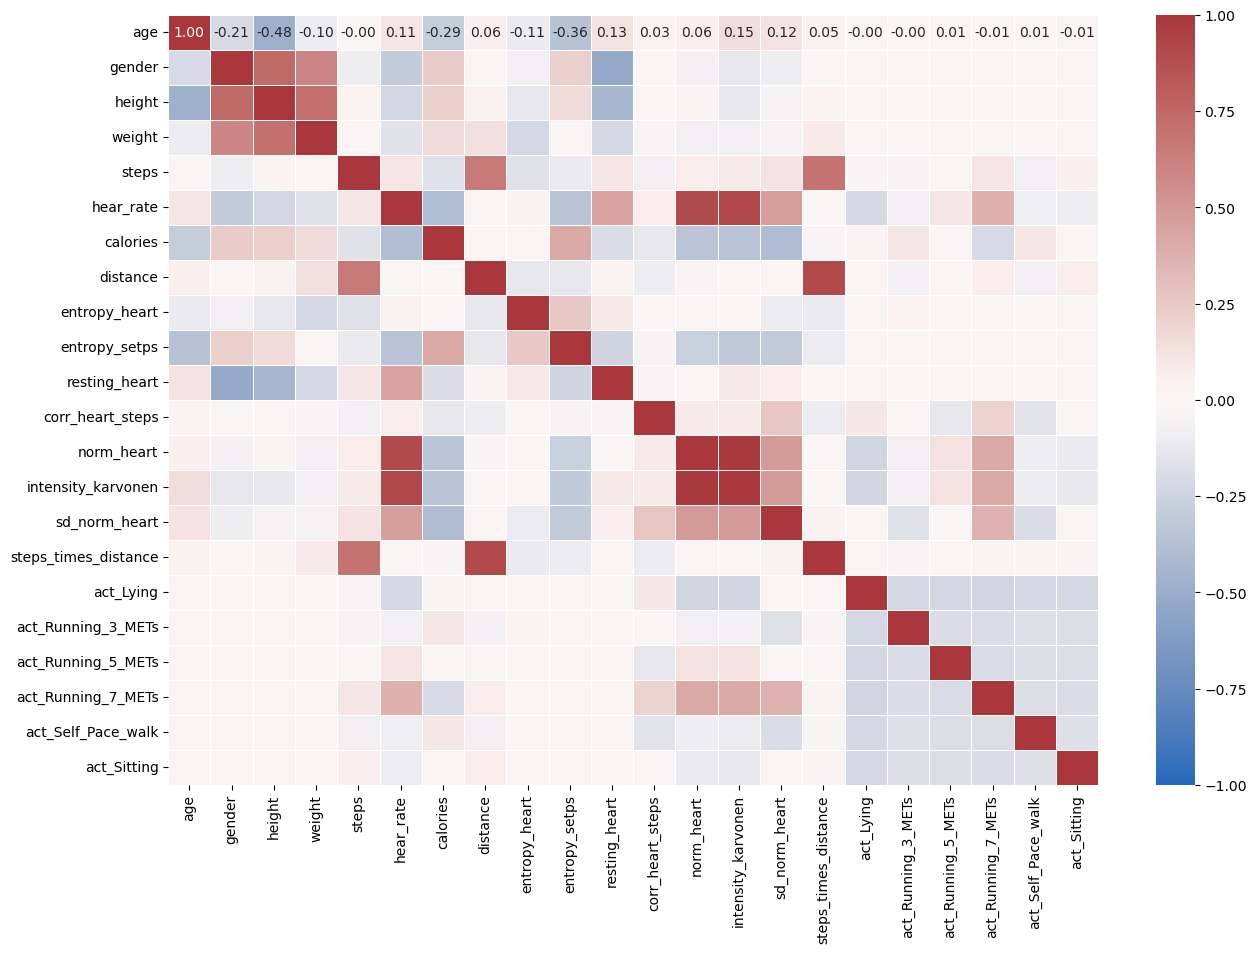